<a href="https://colab.research.google.com/github/mapbefun/mapbefun/blob/main/%EB%94%A5%EB%9F%AC%EB%8B%9D%EC%8B%A4%EC%8A%B5_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Chapter 15

In [ ]:
# %pip install tensorflow (맨 처음 한 번만 실행하면 됨)

In [ ]:
# %pip install --upgrade tensorflow (맨 처음 한 번만 실행하면 됨)

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from keras.layers import Dense, Flatten, Dropout, Activation
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from keras.datasets import mnist

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

In [ ]:
from keras.datasets import mnist

# 데이터세트 로딩
(x_train, y_train),(x_test, y_test) = mnist.load_data()

print("입력변수 형태: ", x_train.shape, x_test.shape)
print("\n출력변수 형태: ", y_train.shape, y_test.shape)

# x 변수가 어떤 형태인지 훈련 세트의 첫 번째 관측을 호출함
print("\n훈련 세트의 첫 번째 x값: \n", x_train[0])
# y 변수가 어떤 형태인지 훈련 세트의 첫 번째 관측을 호출함
print("\n훈련 세트의 첫 번째 y값: ", y_train[0])

입력변수 형태:  (60000, 28, 28) (10000, 28, 28)

출력변수 형태:  (60000,) (10000,)

훈련 세트의 첫 번째 x값: 
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56

출력변수 `y`에 대해 각 레이블 별로 관측 개수가 얼마나 되는지 알아본다.

In [ ]:
unique, counts = np.unique(y_train, return_counts=True)
print("\n훈련 세트 레이블별 관측 개수: ", dict(zip(unique, counts)))

unique, counts = np.unique(y_test, return_counts=True)
print("\n테스트 세트 레이블별 관측 개수: ", dict(zip(unique, counts)))


훈련 세트 레이블별 관측 개수:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}

테스트 세트 레이블별 관측 개수:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


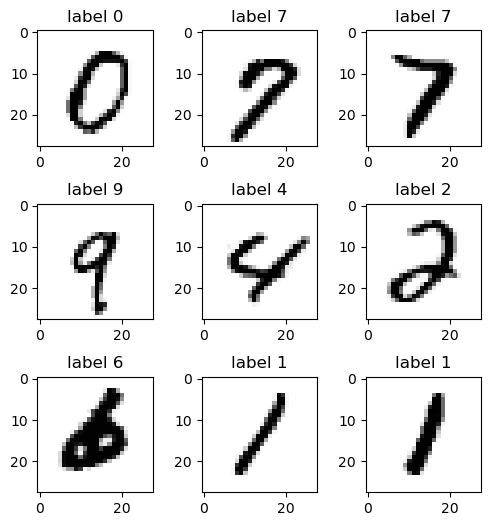

In [ ]:
plt.rcParams['figure.figsize'] = (6,6)  # 그림 크기 정하기

for i in range(9): # range(9)는 0부터 8까지 정수 9개
    plt.subplot(3,3,i+1) # 3x3 subplot을 하나씩 채워나감
    num = np.random.randint(0, len(x_train))  # 훈련 세트에서 임의로 손글씨 하나를 고름
    plt.imshow(x_train[num], cmap='Greys')
    plt.title("label {}". format(y_train[num]))
    plt.subplots_adjust(hspace=.5) # 하위그림의 위아래 간격을 조정

In [ ]:
to_categorical(3, num_classes=10)

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train.shape, y_test.shape

((60000, 10), (10000, 10))

In [ ]:
# resize
x_train = np.reshape(x_train, (60000, 784))
x_test = np.reshape(x_test, (10000, 784))

x_train.shape, x_test.shape

((60000, 784), (10000, 784))

In [ ]:
x_train[0].round(1)

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [ ]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [ ]:
# 2개의 은닉층을 지닌 신경망 모델 설정
modelnn = Sequential()
modelnn.add(Dense(256, input_dim=784))
modelnn.add(Activation('relu'))
modelnn.add(Dropout(0.4))
modelnn.add(Dense(128))
modelnn.add(Activation('relu'))
modelnn.add(Dropout(0.3))
modelnn.add(Dense(10))
modelnn.add(Activation('softmax'))

modelnn.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 activation_1 (Activation)   (None, 128)               0         
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                

위에서 설명했듯이 첫번째 은닉층의 유닛을 256개로 하고 두 번째 은닉층의 유닛을 128개로 할 경우 추정해야 하는 파라미터는 총 235,146개임을 확인할 수 있다. 위 결과 표에서 첫 번째 열의 항목 중 `dense`, `activation`, `dropout`에 `_1`, `_2` 등의 첨자가 표시돼있는데, 이는 별 의미가 없다. 모델을 바꾸지 않고 동일한 모델을 다시 피팅하면 첨자 숫자가 바뀌게 되는데, `Sequential()`이 호출될 때마다 첨자의 값이 커진다.

In [ ]:
modelnn.compile(loss='categorical_crossentropy',
                optimizer='RMSprop',
                metrics=['accuracy'])

In [ ]:
results = modelnn.fit(x_train, y_train,
                      epochs = 20,
                      batch_size = 128,
                      validation_split = 0.2)

Epoch 1/20


375/375 [==============================] - 3s 6ms/step - loss: 0.4331 - accuracy: 0.8678 - val_loss: 0.1623 - val_accuracy: 0.9511
Epoch 2/20
375/375 [==============================] - 2s 5ms/step - loss: 0.2054 - accuracy: 0.9384 - val_loss: 0.1264 - val_accuracy: 0.9630
Epoch 3/20
375/375 [==============================] - 2s 5ms/step - loss: 0.1561 - accuracy: 0.9530 - val_loss: 0.1087 - val_accuracy: 0.9673
Epoch 4/20
375/375 [==============================] - 2s 5ms/step - loss: 0.1305 - accuracy: 0.9612 - val_loss: 0.0979 - val_accuracy: 0.9721
Epoch 5/20
375/375 [==============================] - 2s 5ms/step - loss: 0.1141 - accuracy: 0.9662 - val_loss: 0.0853 - val_accuracy: 0.9743
Epoch 6/20
375/375 [==============================] - 2s 5ms/step - loss: 0.1056 - accuracy: 0.9687 - val_loss: 0.0841 - val_accuracy: 0.9755
Epoch 7/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0940 - accuracy: 0.9719 - val_loss: 0.0835 - val_accuracy: 0.9763
Epoc

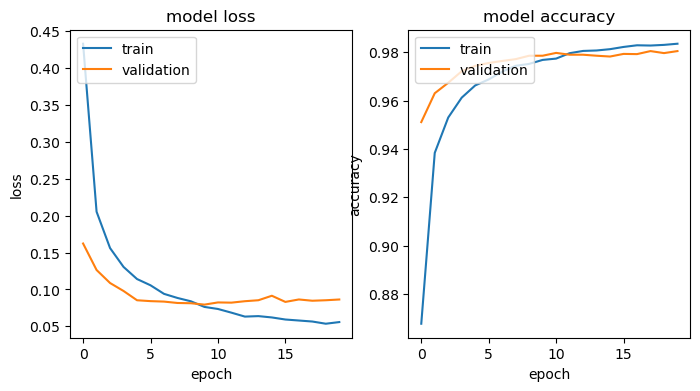

In [ ]:
fig = plt.figure(figsize=(8,4))

# 손실함수(loss) 그림
plt.subplot(121)
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

# 정확도(accuracy) 그림
plt.subplot(122)
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
loss, acc = modelnn.evaluate(x_test, y_test, batch_size = 128)
print("\n신경망 모델 테스트 세트 정확도: %.2f%%" % (100.0 * acc))

79/79 [==============================] - 0s 2ms/step - loss: 0.0815 - accuracy: 0.9801

신경망 모델 테스트 세트 정확도: 98.01%


In [ ]:
# 입력층과 출력층만을 지닌 모델 설정
modellr = Sequential()
modellr.add(Dense(10, input_dim=784))
modellr.add(Activation('softmax'))

modellr.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                7850      
                                                                 
 activation_3 (Activation)   (None, 10)                0         
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
modellr.compile(loss='categorical_crossentropy',
                optimizer='RMSprop',
                metrics=['accuracy'])

In [ ]:
modellr.fit(x_train, y_train,
            epochs = 20,
            batch_size = 128,
            validation_split = 0.2)

Epoch 1/20
375/375 [==============================] - 1s 3ms/step - loss: 0.6626 - accuracy: 0.8373 - val_loss: 0.3593 - val_accuracy: 0.9047
Epoch 2/20
375/375 [==============================] - 1s 2ms/step - loss: 0.3528 - accuracy: 0.9035 - val_loss: 0.3087 - val_accuracy: 0.9138
Epoch 3/20
375/375 [==============================] - 1s 2ms/step - loss: 0.3176 - accuracy: 0.9117 - val_loss: 0.2903 - val_accuracy: 0.9193
Epoch 4/20
375/375 [==============================] - 1s 2ms/step - loss: 0.3019 - accuracy: 0.9161 - val_loss: 0.2835 - val_accuracy: 0.9202
Epoch 5/20
375/375 [==============================] - 1s 2ms/step - loss: 0.2923 - accuracy: 0.9185 - val_loss: 0.2776 - val_accuracy: 0.9231
Epoch 6/20
375/375 [==============================] - 1s 2ms/step - loss: 0.2854 - accuracy: 0.9204 - val_loss: 0.2745 - val_accuracy: 0.9245
Epoch 7/20
375/375 [==============================] - 1s 2ms/step - loss: 0.2807 - accuracy: 0.9221 - val_loss: 0.2728 - val_accuracy: 0.9246
Epoch 

In [ ]:
loss, acc = modellr.evaluate(x_test, y_test, batch_size = 128)
print("\n로지스틱 회귀 모델 테스트 세트 정확도: %.2f%%" % (100.0 * acc))

79/79 [==============================] - 0s 2ms/step - loss: 0.2699 - accuracy: 0.9251

로지스틱 회귀 모델 테스트 세트 정확도: 92.51%
